In [62]:
import pandas as pd

In [63]:
df=pd.read_csv("allitems.csv")
df.head()

,Name,Status,Description,References,Phase,Votes,Comments
0,CVE-1999-0001,Candidate,ip_input.c in BSD-derived TCP/IP implementatio...,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,Modified (20051217),"MODIFY(1) Frech | NOOP(2) Northcutt, W...",Christey> A Bugtraq posting indicates that the...
1,CVE-1999-0002,Entry,Buffer overflow in NFS mountd gives root acces...,BID:121 | URL:http://www.securityfocus.com...,NaN,NaN,NaN
2,CVE-1999-0003,Entry,Execute commands as root via buffer overflow i...,BID:122 | URL:http://www.securityfocus.com...,NaN,NaN,NaN
3,CVE-1999-0004,Candidate,"MIME buffer overflow in email clients, e.g. So...",CERT:CA-98.10.mime_buffer_overflows | MS:M...,Modified (19990621),"ACCEPT(8) Baker, Cole, Collins, Dik, Landfi...","Frech> Extremely minor, but I believe e-mail i..."
4,CVE-1999-0005,Entry,Arbitrary command execution via IMAP buffer ov...,BID:130 | URL:http://www.securityfocus.com...,NaN,NaN,NaN


In [64]:
df.tail()

,Name,Status,Description,References,Phase,Votes,Comments
995,CVE-1999-1015,Candidate,Buffer overflow in Apple AppleShare Mail Serve...,BID:61 | URL:http://www.securityfocus.com/...,Proposed (20010912),"MODIFY(1) Frech | NOOP(3) Cole, Foat, ...",Frech> XF:smtp-helo-bo(886)
996,CVE-1999-1016,Candidate,Microsoft HTML control as used in (1) Internet...,BID:606 | URL:http://www.securityfocus.com...,Modified (20040811),"ACCEPT(2) Cole, Wall | MODIFY(1) Frech...",Frech> XF:ms-html-table-form-dos(3246) | F...
997,CVE-1999-1017,Candidate,"Seattle Labs Emurl 2.0, and possibly earlier v...",BID:544 | URL:http://www.securityfocus.com...,Proposed (20010912),"MODIFY(1) Frech | NOOP(3) Cole, Foat, ...",Frech> (Task 2281) | CHANGE> [Frech change...
998,CVE-1999-1018,Candidate,IPChains in Linux kernels 2.2.10 and earlier d...,BID:543 | URL:http://www.securityfocus.com...,Proposed (20010912),ACCEPT(1) Cole | MODIFY(1) Frech | ...,Frech> XF:linux-ipchains-bypass-filter(6516) ...
999,CVE-1999-1019,Entry,SpectroSERVER in Cabletron Spectrum Enterprise...,BID:495 | URL:http://www.securityfocus.com...,NaN,NaN,NaN


In [65]:
df['References'][995] 

'BID:61   |   URL:http://www.securityfocus.com/bid/61   |   BUGTRAQ:19980408 AppleShare IP Mail Server   |   URL:http://marc.info/?l=bugtraq&m=89200657216213&w=2'

In [66]:
df['Description'][995] 

'Buffer overflow in Apple AppleShare Mail Server 5.0.3 on MacOS 8.1 and earlier allows a remote attacker to cause a denial of service (crash) via a long HELO command.'

In [67]:
df['Comments'][995] 

'Frech> XF:smtp-helo-bo(886)'

In [68]:
df=df.drop(['Phase'],axis=1)
df.head()


,Name,Status,Description,References,Votes,Comments
0,CVE-1999-0001,Candidate,ip_input.c in BSD-derived TCP/IP implementatio...,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,"MODIFY(1) Frech | NOOP(2) Northcutt, W...",Christey> A Bugtraq posting indicates that the...
1,CVE-1999-0002,Entry,Buffer overflow in NFS mountd gives root acces...,BID:121 | URL:http://www.securityfocus.com...,NaN,NaN
2,CVE-1999-0003,Entry,Execute commands as root via buffer overflow i...,BID:122 | URL:http://www.securityfocus.com...,NaN,NaN
3,CVE-1999-0004,Candidate,"MIME buffer overflow in email clients, e.g. So...",CERT:CA-98.10.mime_buffer_overflows | MS:M...,"ACCEPT(8) Baker, Cole, Collins, Dik, Landfi...","Frech> Extremely minor, but I believe e-mail i..."
4,CVE-1999-0005,Entry,Arbitrary command execution via IMAP buffer ov...,BID:130 | URL:http://www.securityfocus.com...,NaN,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1000 non-null   object
 1   Status       1000 non-null   object
 2   Description  1000 non-null   object
 3   References   969 non-null    object
 4   Votes        353 non-null    object
 5   Comments     323 non-null    object
dtypes: object(6)
memory usage: 47.0+ KB


In [70]:
df.isnull().sum()

Name             0
Status           0
Description      0
References      31
Votes          647
Comments       677
dtype: int64

In [71]:
df = df.dropna(subset=['References'])
df.isnull().sum()

Name             0
Status           0
Description      0
References       0
Votes          646
Comments       663
dtype: int64

In [72]:
import re

def extract_and_sum_votes(votes):
    numbers_in_brackets = re.findall(r'\((\d+)\)', str(votes))
    return sum(map(int, numbers_in_brackets))

df['NVotes'] = df['Votes'].apply(extract_and_sum_votes)
df=df.drop(['Votes'],axis=1)
df.head()

,Name,Status,Description,References,Comments,NVotes
0,CVE-1999-0001,Candidate,ip_input.c in BSD-derived TCP/IP implementatio...,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,Christey> A Bugtraq posting indicates that the...,4
1,CVE-1999-0002,Entry,Buffer overflow in NFS mountd gives root acces...,BID:121 | URL:http://www.securityfocus.com...,NaN,0
2,CVE-1999-0003,Entry,Execute commands as root via buffer overflow i...,BID:122 | URL:http://www.securityfocus.com...,NaN,0
3,CVE-1999-0004,Candidate,"MIME buffer overflow in email clients, e.g. So...",CERT:CA-98.10.mime_buffer_overflows | MS:M...,"Frech> Extremely minor, but I believe e-mail i...",11
4,CVE-1999-0005,Entry,Arbitrary command execution via IMAP buffer ov...,BID:130 | URL:http://www.securityfocus.com...,NaN,0


In [73]:
df1 = df.copy()
df2 = df.copy()


# Extraction

In [74]:
import pandas as pd
import re

os_list = ['Windows', 'Linux', 'MacOS', 'FreeBSD', 'Unix', 'Android', 'iOS']

def extract_os_names(row):
    os_names = re.findall(r'XF:(\w+)', str(row['References']))
    if not os_names:
        os_pattern = '|'.join(os_list)  
        combined_text = f"{row['References']} {row['Description']}"
        os_names = re.findall(rf'\b({os_pattern})\b', combined_text, re.IGNORECASE)
    
    return list(set(os_names))

df2['OS_Names'] = df2.apply(extract_os_names, axis=1)

print(df2[['References', 'Description', 'OS_Names']])


                                            References  \
0    BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...   
1    BID:121   |   URL:http://www.securityfocus.com...   
2    BID:122   |   URL:http://www.securityfocus.com...   
3    CERT:CA-98.10.mime_buffer_overflows   |   MS:M...   
4    BID:130   |   URL:http://www.securityfocus.com...   
..                                                 ...   
995  BID:61   |   URL:http://www.securityfocus.com/...   
996  BID:606   |   URL:http://www.securityfocus.com...   
997  BID:544   |   URL:http://www.securityfocus.com...   
998  BID:543   |   URL:http://www.securityfocus.com...   
999  BID:495   |   URL:http://www.securityfocus.com...   

                                           Description         OS_Names  
0    ip_input.c in BSD-derived TCP/IP implementatio...               []  
1    Buffer overflow in NFS mountd gives root acces...          [linux]  
2    Execute commands as root via buffer overflow i...  [tooltalk, aix]  
3    MI

## Resemblance of CVE

In [75]:
import pandas as pd
import re

def extract_cves(comments):
    cve_matches = re.findall(r'CVE-\d{4}-\d{4,7}', str(comments))
    return cve_matches

df2['CVEs'] = df2['Comments'].apply(extract_cves)

print(df2[['Comments', 'CVEs']])


                                              Comments  \
0    Christey> A Bugtraq posting indicates that the...   
1                                                  NaN   
2                                                  NaN   
3    Frech> Extremely minor, but I believe e-mail i...   
4                                                  NaN   
..                                                 ...   
995                        Frech> XF:smtp-helo-bo(886)   
996  Frech> XF:ms-html-table-form-dos(3246)  |    F...   
997  Frech> (Task 2281)  |    CHANGE> [Frech change...   
998  Frech> XF:linux-ipchains-bypass-filter(6516)  ...   
999                                                NaN   

                                                  CVEs  
0    [CVE-1999-0052, CVE-1999-0257, CVE-1999-0001, ...  
1                                                   []  
2                                                   []  
3                                      [CVE-2000-0415]  
4                 

# LLMS

### Combining text

In [76]:
# df1.head(10)

In [77]:

df1['References'] = df1['References'].fillna('')
df1['Description'] = df['Description'].fillna('')
df1['Comments'] = df1['Comments'].fillna('')

df1['combined_text'] = df1['References'] + ' ' + df1['Description'] + ' ' + df1['Comments']

print(df1[['combined_text']].head())


df1.head()


                                       combined_text
0  BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...
1  BID:121   |   URL:http://www.securityfocus.com...
2  BID:122   |   URL:http://www.securityfocus.com...
3  CERT:CA-98.10.mime_buffer_overflows   |   MS:M...
4  BID:130   |   URL:http://www.securityfocus.com...


,Name,Status,Description,References,Comments,NVotes,combined_text
0,CVE-1999-0001,Candidate,ip_input.c in BSD-derived TCP/IP implementatio...,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,Christey> A Bugtraq posting indicates that the...,4,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...
1,CVE-1999-0002,Entry,Buffer overflow in NFS mountd gives root acces...,BID:121 | URL:http://www.securityfocus.com...,,0,BID:121 | URL:http://www.securityfocus.com...
2,CVE-1999-0003,Entry,Execute commands as root via buffer overflow i...,BID:122 | URL:http://www.securityfocus.com...,,0,BID:122 | URL:http://www.securityfocus.com...
3,CVE-1999-0004,Candidate,"MIME buffer overflow in email clients, e.g. So...",CERT:CA-98.10.mime_buffer_overflows | MS:M...,"Frech> Extremely minor, but I believe e-mail i...",11,CERT:CA-98.10.mime_buffer_overflows | MS:M...
4,CVE-1999-0005,Entry,Arbitrary command execution via IMAP buffer ov...,BID:130 | URL:http://www.securityfocus.com...,,0,BID:130 | URL:http://www.securityfocus.com...


## TTPs Extraction Using Transformers

In [78]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load the pre-trained model and tokenizer
model_name = "dslim/bert-base-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# NER pipeline
extractor = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple", device=-1)

# Batch NER extraction function
def extract_batch_info_with_bert(texts, batch_size=16):
    batched_entities = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        batched_entities.extend(extractor(batch))
    return batched_entities

# Parsing function
def parse_extracted_info(entities, texts):
    extracted_data = {
        "Environments": [],
        "Attack Vectors": [],
        "Prerequisites": [],
        "Potential Outputs": [],
        "TTPs": []
    }
    
    keywords = {
        "Environments": ['windows', 'linux', 'mac', 'freebsd'],
        "Attack Vectors": ['phishing', 'malware', 'teardrop'],
        "Prerequisites": ['escalation', 'privilege'],
        "Potential Outputs": ['data breach', 'crash'],
        "TTPs": ['cve-1999-0052', 't1071', 't1566', 'cve-1999-0001']
    }

    for idx, text in enumerate(texts):
        text_lower = text.lower()
        extracted_data["Environments"].append([env for env in keywords["Environments"] if env in text_lower])
        extracted_data["Attack Vectors"].append([av for av in keywords["Attack Vectors"] if av in text_lower])
        extracted_data["Prerequisites"].append([prereq for prereq in keywords["Prerequisites"] if prereq in text_lower])
        extracted_data["Potential Outputs"].append([output for output in keywords["Potential Outputs"] if output in text_lower])
        extracted_data["TTPs"].append([ttp for ttp in keywords["TTPs"] if ttp in text_lower])

        for key in extracted_data:
            if not extracted_data[key][idx]:
                extracted_data[key][idx] = ["Not Available"]

    return extracted_data

# Assuming df1 is your DataFrame
if 'combined_text' in df1.columns:
    texts = df1['combined_text'].tolist()
    entities = extract_batch_info_with_bert(texts)
    parsed_info = parse_extracted_info(entities, texts)
    df1['Environments'] = pd.Series(parsed_info["Environments"]).apply(lambda x: ', '.join(x))
    df1['Attack Vectors'] = pd.Series(parsed_info["Attack Vectors"]).apply(lambda x: ', '.join(x))
    df1['Prerequisites'] = pd.Series(parsed_info["Prerequisites"]).apply(lambda x: ', '.join(x))
    df1['Potential Outputs'] = pd.Series(parsed_info["Potential Outputs"]).apply(lambda x: ', '.join(x))
    df1['TTPs'] = pd.Series(parsed_info["TTPs"]).apply(lambda x: ', '.join(x))
else:
    print("The column 'combined_text' is not found in the DataFrame.")

# Save the updated DataFrame to a CSV file
output_file = 'updated_cve_data.csv'
df1.to_csv(output_file, index=False)

# Print the updated DataFrame
print(df1[['combined_text', 'Environments', 'Attack Vectors', 'Prerequisites', 'Potential Outputs', 'TTPs']])



Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                         combined_text    Environments  \
0    BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...  linux, freebsd   
1    BID:121   |   URL:http://www.securityfocus.com...           linux   
2    BID:122   |   URL:http://www.securityfocus.com...   Not Available   
3    CERT:CA-98.10.mime_buffer_overflows   |   MS:M...   Not Available   
4    BID:130   |   URL:http://www.securityfocus.com...   Not Available   
..                                                 ...             ...   
995  BID:61   |   URL:http://www.securityfocus.com/...             NaN   
996  BID:606   |   URL:http://www.securityfocus.com...             NaN   
997  BID:544   |   URL:http://www.securityfocus.com...             NaN   
998  BID:543   |   URL:http://www.securityfocus.com...             NaN   
999  BID:495   |   URL:http://www.securityfocus.com...             NaN   

    Attack Vectors  Prerequisites Potential Outputs  \
0         teardrop  Not Available             crash   
1

In [79]:
df1.head(10)

,Name,Status,Description,References,Comments,NVotes,combined_text,Environments,Attack Vectors,Prerequisites,Potential Outputs,TTPs
0,CVE-1999-0001,Candidate,ip_input.c in BSD-derived TCP/IP implementatio...,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,Christey> A Bugtraq posting indicates that the...,4,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,"linux, freebsd",teardrop,Not Available,crash,"cve-1999-0052, cve-1999-0001"
1,CVE-1999-0002,Entry,Buffer overflow in NFS mountd gives root acces...,BID:121 | URL:http://www.securityfocus.com...,,0,BID:121 | URL:http://www.securityfocus.com...,linux,Not Available,Not Available,Not Available,Not Available
2,CVE-1999-0003,Entry,Execute commands as root via buffer overflow i...,BID:122 | URL:http://www.securityfocus.com...,,0,BID:122 | URL:http://www.securityfocus.com...,Not Available,Not Available,Not Available,Not Available,Not Available
3,CVE-1999-0004,Candidate,"MIME buffer overflow in email clients, e.g. So...",CERT:CA-98.10.mime_buffer_overflows | MS:M...,"Frech> Extremely minor, but I believe e-mail i...",11,CERT:CA-98.10.mime_buffer_overflows | MS:M...,Not Available,Not Available,Not Available,Not Available,Not Available
4,CVE-1999-0005,Entry,Arbitrary command execution via IMAP buffer ov...,BID:130 | URL:http://www.securityfocus.com...,,0,BID:130 | URL:http://www.securityfocus.com...,Not Available,Not Available,Not Available,Not Available,Not Available
5,CVE-1999-0006,Entry,Buffer overflow in POP servers based on BSD/Qu...,AUSCERT:AA-98.01 | BID:133 | URL:http:...,,0,AUSCERT:AA-98.01 | BID:133 | URL:http:...,Not Available,Not Available,Not Available,Not Available,Not Available
6,CVE-1999-0007,Entry,Information from SSL-encrypted sessions via PK...,CERT:CA-98.07.PKCS | MS:MS98-002 | URL...,,0,CERT:CA-98.07.PKCS | MS:MS98-002 | URL...,Not Available,Not Available,Not Available,Not Available,Not Available
7,CVE-1999-0008,Entry,"Buffer overflow in NIS+, in Sun's rpc.nisd pro...","CERT:CA-98.06.nisd | ISS:June10,1998 | ...",,0,"CERT:CA-98.06.nisd | ISS:June10,1998 | ...",Not Available,Not Available,Not Available,Not Available,Not Available
8,CVE-1999-0009,Entry,Inverse query buffer overflow in BIND 4.9 and ...,BID:134 | URL:http://www.securityfocus.com...,,0,BID:134 | URL:http://www.securityfocus.com...,Not Available,Not Available,Not Available,Not Available,Not Available
9,CVE-1999-0010,Entry,Denial of Service vulnerability in BIND 8 Rele...,CERT:CA-98.05.bind_problems | HP:HPSBUX980...,,0,CERT:CA-98.05.bind_problems | HP:HPSBUX980...,Not Available,Not Available,Not Available,Not Available,Not Available


C:\Users\MY DELL\AppData\Local\Temp\ipykernel_24544\1374334571.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=env_freq.index, y=env_freq.values, palette="Blues_d")
C:\Users\MY DELL\AppData\Local\Temp\ipykernel_24544\1374334571.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_freq.index, y=attack_freq.values, palette="Reds_d")
C:\Users\MY DELL\AppData\Local\Temp\ipykernel_24544\1374334571.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prereq_freq.index, y=prereq_freq.values, palette="Greens_d")
C:\Users\MY DELL\Ap

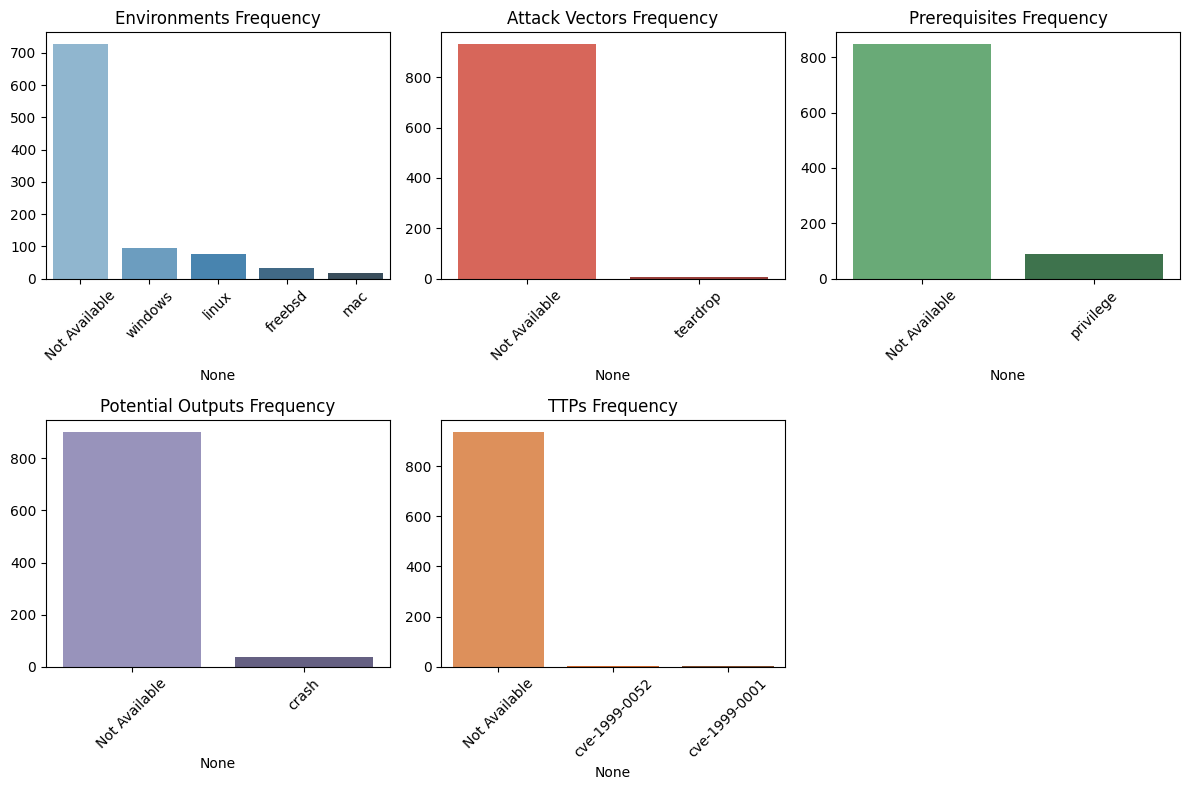

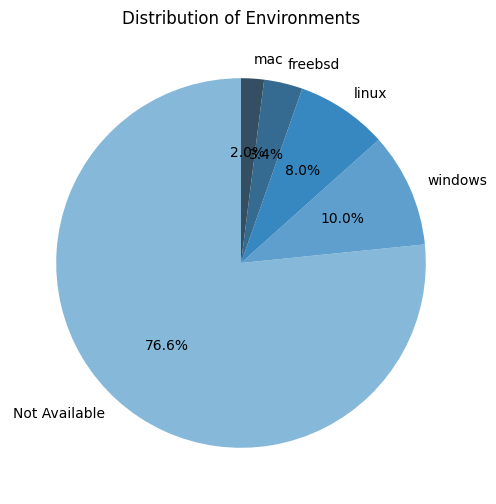

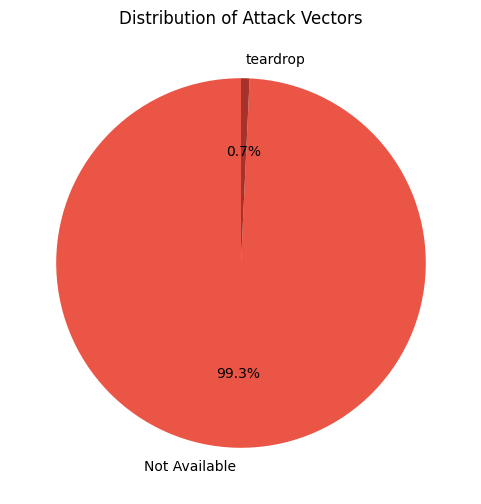

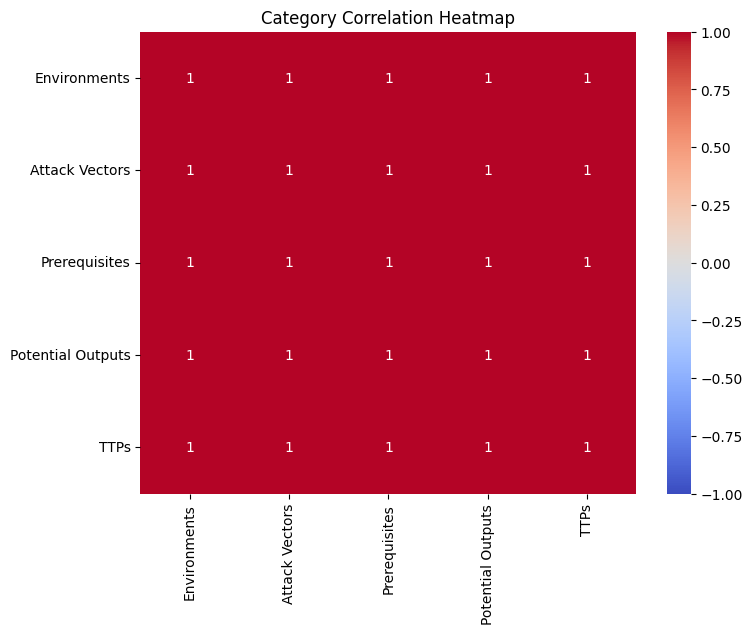

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def count_category_frequency(df, column):
    return df[column].str.split(', ', expand=True).stack().value_counts()

# Frequency of Environments
env_freq = count_category_frequency(df1, 'Environments')

# Frequency of Attack Vectors
attack_freq = count_category_frequency(df1, 'Attack Vectors')

# Frequency of Prerequisites
prereq_freq = count_category_frequency(df1, 'Prerequisites')

# Frequency of Potential Outputs
output_freq = count_category_frequency(df1, 'Potential Outputs')

# Frequency of TTPs
ttp_freq = count_category_frequency(df1, 'TTPs')

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.barplot(x=env_freq.index, y=env_freq.values, palette="Blues_d")
plt.title("Environments Frequency")
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.barplot(x=attack_freq.index, y=attack_freq.values, palette="Reds_d")
plt.title("Attack Vectors Frequency")
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.barplot(x=prereq_freq.index, y=prereq_freq.values, palette="Greens_d")
plt.title("Prerequisites Frequency")
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.barplot(x=output_freq.index, y=output_freq.values, palette="Purples_d")
plt.title("Potential Outputs Frequency")
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.barplot(x=ttp_freq.index, y=ttp_freq.values, palette="Oranges_d")
plt.title("TTPs Frequency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
env_freq.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Blues_d", len(env_freq)), startangle=90, legend=False)
plt.title("Distribution of Environments")
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
attack_freq.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Reds_d", len(attack_freq)), startangle=90, legend=False)
plt.title("Distribution of Attack Vectors")
plt.ylabel('')
plt.show()

categories = ['Environments', 'Attack Vectors', 'Prerequisites', 'Potential Outputs', 'TTPs']
df_binary = pd.DataFrame(columns=categories)

for index, row in df1.iterrows():
    for category in categories:
        df_binary.loc[index, category] = 1 if isinstance(row[category], str) and len(row[category].split(', ')) > 0 else 0

plt.figure(figsize=(8, 6))
sns.heatmap(df_binary.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Category Correlation Heatmap")
plt.show()

